# Time Series Plot of Temperature data across years

## Import the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [34]:
df = pd.read_csv('/content/all countries global temperature.csv')

## Identify the Correct Time-Series Structure

In [35]:
# Convert from wide to long format
df_long = df.melt(id_vars=['Country Name'],
                  var_name='Year',
                  value_name='Temperature_Change')

# Quick check
print(df_long.head())

                   Country Name      Year Temperature_Change
0  Afghanistan, Islamic Rep. of  ObjectId                  1
1                       Albania  ObjectId                  2
2                       Algeria  ObjectId                  3
3                American Samoa  ObjectId                  4
4      Andorra, Principality of  ObjectId                  5


## Code to Plot India and USA

In [36]:
# Remove non-numeric text and convert to float
df_long['Temperature_Change'] = pd.to_numeric(
    df_long['Temperature_Change'], errors='coerce'
)

# Quick check
print(df_long[['Year','Country Name','Temperature_Change']].head())

       Year                  Country Name  Temperature_Change
0  ObjectId  Afghanistan, Islamic Rep. of                 1.0
1  ObjectId                       Albania                 2.0
2  ObjectId                       Algeria                 3.0
3  ObjectId                American Samoa                 4.0
4  ObjectId      Andorra, Principality of                 5.0


In [37]:
# Filter data for India and USA
subset = df_long[df_long['Country Name'].isin(['India', 'United States'])]

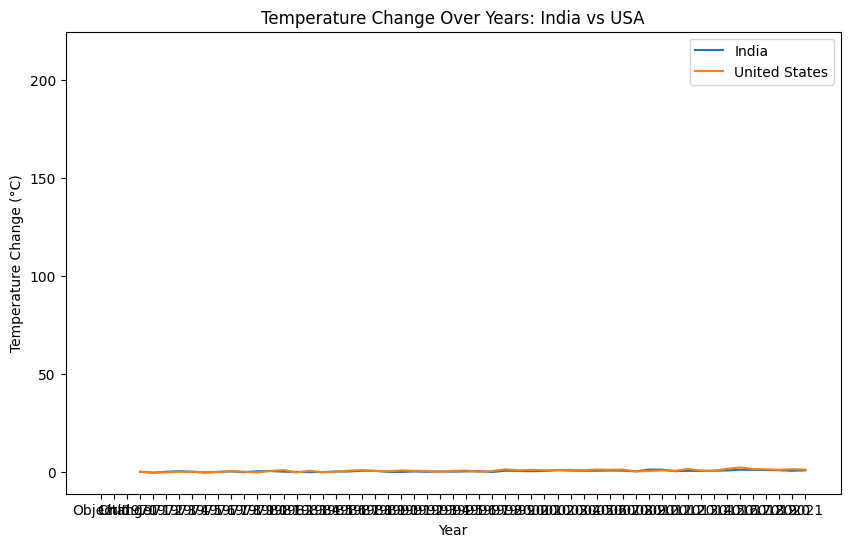

In [38]:
# Plot line chart
plt.figure(figsize=(10,6))
for country in subset['Country Name'].unique():
    country_data = subset[subset['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Temperature_Change'], label=country)

# Add labels and legend
plt.title("Temperature Change Over Years: India vs USA")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.legend()
plt.show()

## Handle Missing Values

In [39]:
# Replace empty strings with NaN
df_long['Temperature_Change'].replace('', np.nan)

# Quick check
print(df_long['Temperature_Change'].isna().sum())

1647


## Convert Year Column to Date and Time

In [43]:
# Convert to numeric, invalid entries become NaN
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Drop rows where Year is NaN
df_long = df_long.dropna(subset=['Year'])

df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y')
print(df_long['Year'].dtype)   # should show datetime64[ns]


datetime64[ns]


## Anatomy of a Time‑Series Plot


🧠 Why Each Element Matters
---------------------------

*   **X‑axis (Year)** → ensures chronological order, so you can see trends across decades.
    
*   **Y‑axis (Temperature Change)** → quantifies the magnitude of change.
    
*   **Line** → reveals the overall trend (rising, falling, stable).
    
*   **Markers** → make raw data points visible, useful for spotting anomalies.
    
*   **Grid** → improves readability, especially when comparing multiple countries.
    

📊 Conceptual Example (India vs USA)
------------------------------------

Imagine plotting India and USA temperature changes:

*   **India line** → steadily rising after 1980, with markers showing yearly fluctuations.
    
*   **USA line** → similar rise, but with slightly different slope.
    
*   **Grid** → lets you easily compare 1990 vs 2020 values.

Interpretation (MOST IMPORTANT PART)

Once plotted, ask these questions 👇
(This is what examiners & interviewers care about)

🔍 Trend

Is temperature increasing over time?

Is post-2000 warmer than pre-1980?

🔍 Variability

Are early years more volatile?

Is recent data consistently higher?

🔍 Peaks

Which years show maximum warming?

🔍 Climate Insight

Confirms global warming trend

Temperature anomalies rise sharply after 1990